# Name : Raktima Dey

## The Sparks Foundation : Graduation Rotational Internship Program

## Data Science and Business Analytics Intern

## Task 6 : Prediction using Decision Tree Algorithm

### Problem : Create the Decision Tree classifier and visualize it graphically.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import plot_tree

### Importing the dataset

In [2]:
iris_df=pd.read_csv('Iris.csv')
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

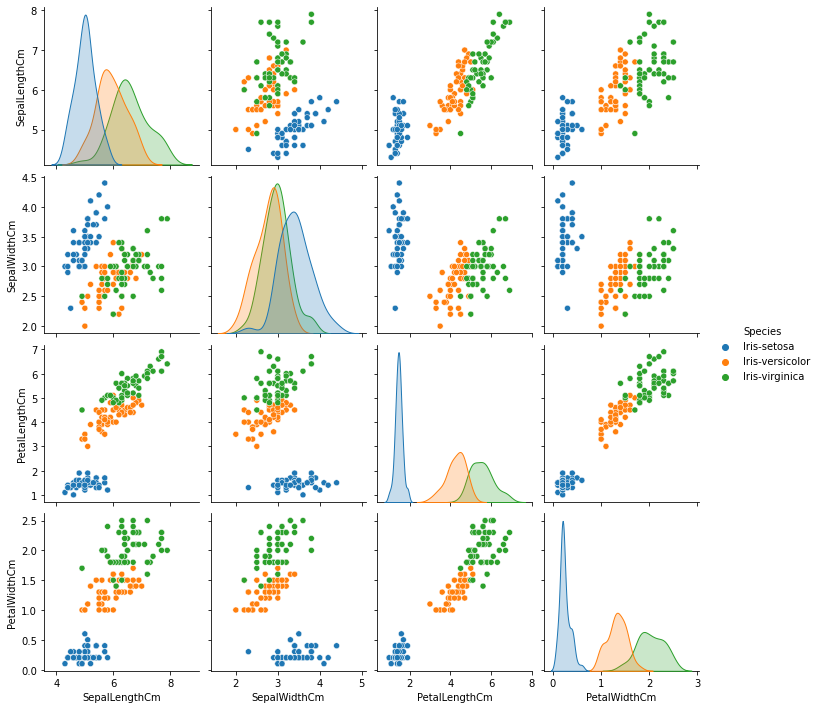

In [6]:
sns.pairplot(data=iris_df,hue='Species')

<AxesSubplot:>

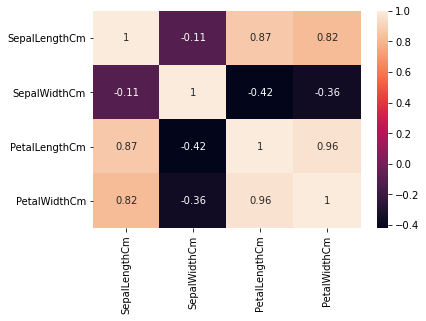

In [7]:
sns.heatmap(iris_df.corr(),annot=True)

From the above plots it can be observed that :

1. Setosa always forms a different cluster.
2. Petal Length is highly related to petal width.
3. Sepal length is not related to sepal width.

### Data Preprocessing

In [8]:
target=iris_df['Species']
df1=iris_df.copy()
df1=df1.drop('Species',axis=1)

In [9]:
X=df1

In [10]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
le=LabelEncoder()
target=le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
y=target

Splitting the dataset into training and testing sets. Selecting 20% records randomly for testing.

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training split input - ",X_train.shape)
print("Testing split input - ",X_test.shape)

Training split input -  (120, 4)
Testing split input -  (30, 4)


After splitting the dataset we have 120 records for training and 30 records for testing purposes.

### Modelling Tree and testing it

In [14]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier has been created')

Decision Tree Classifier has been created


In [15]:
#Predicting the values of test data
y_pred=dtree.predict(X_test)
print("Classification report - \n",classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We got an accuracy of 100% on testing dataset of 30 records.

### Plotting the confusion matrix

Text(0.5, 1.0, 'Accuracy Score: 1.0')

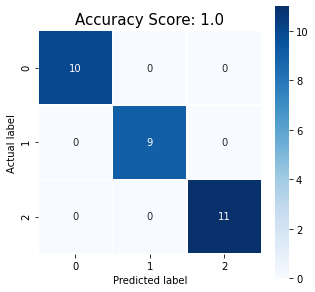

In [16]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5)),sns.heatmap(data=cm,linewidth=0.5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score: {0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title,size=15)

### Visualizing the decision tree

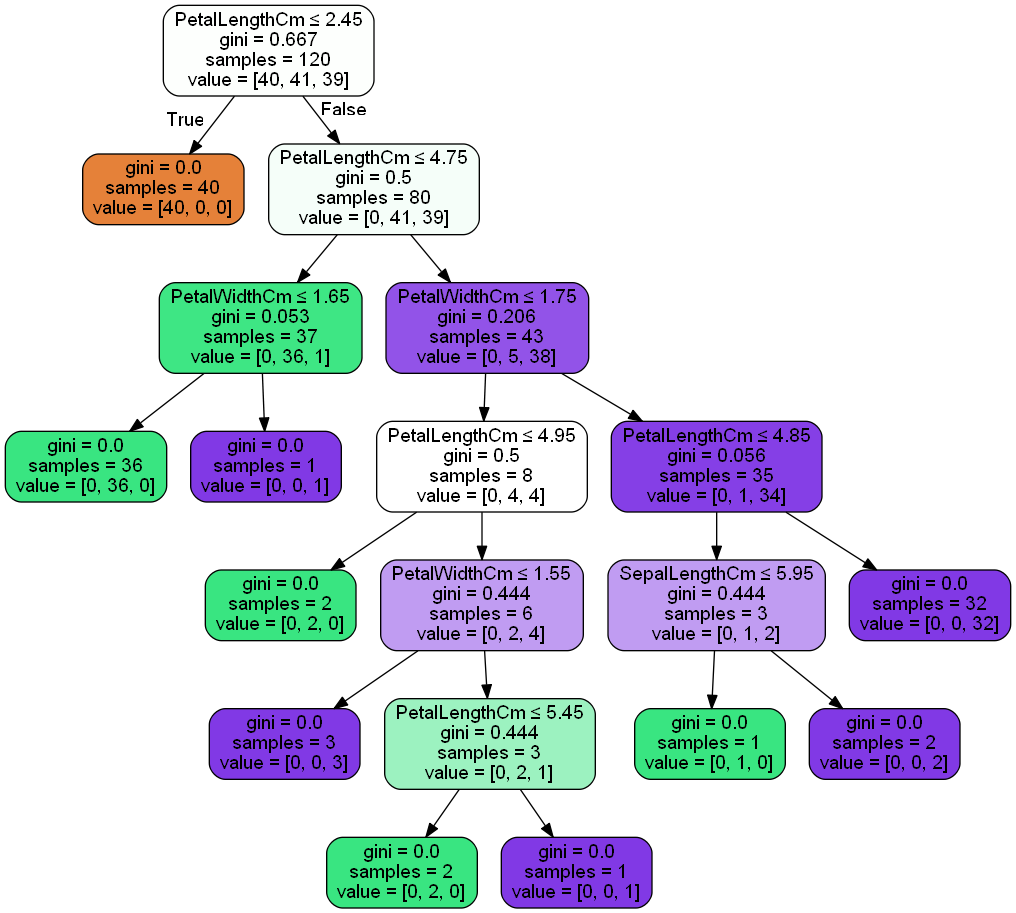

In [25]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO() #Text I/O implementation using an in-memory buffer.
export_graphviz(dtree, out_file=dot_data, feature_names=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  #Load graph as defined by data in DOT format
Image(graph.create_png())

In [59]:
from dtreeviz.trees import dtreeviz
viz=dtreeviz(dtree,X_train,y_train,target_name="target",feature_names=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'),class_names=["setosa","vercicolor","verginica"],scale=2.5)
viz.view()